# M8
***ML_unsupervised***
___

En este sprint usaremos modelos de aprendizaje no supervisados en el conjunto de datos referente a las publicaciones sobre ventas en Facebook Live y sus reacciones. Son datos recogidos en Tailandia entre los años 2012 y 2018.

### <u>OBJETIVOS:</u>

+ Limpieza e interpretación de los datos.
+ Preprocesados y PCA.
+ Encontrar el número de clústers óptimo.
+ Creación de modelos no supervisados (k-means y clustering jerárquico).
+ Interpretar los resultados.

### <u>BIBLIOTECAS NECESARIAS:</u>

In [171]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)
Empezamos **importando** los **datos** desde un archivo csv.

In [172]:
thai_data=pd.read_csv('/Users/angel/Desktop/Publicacions Facebook Thailandia.csv')
thai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [173]:
thai_data.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

Comprobamos el tipo de dato y a continuación buscamos **duplicados**.

In [174]:
thai_data[thai_data.duplicated()]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN
6224,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0,NaN,NaN,NaN,NaN
6226,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0,NaN,NaN,NaN,NaN
6227,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0,NaN,NaN,NaN,NaN
6228,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0,NaN,NaN,NaN,NaN
6229,819700534875473_995218893990302,status,5/29/2018 4:39,133,7,1,127,6,0,0,0,0,NaN,NaN,NaN,NaN
6230,819700534875473_993975437447981,photo,5/27/2018 1:31,532,32,4,480,47,5,0,0,0,NaN,NaN,NaN,NaN


In [175]:
num_duplicates = len(thai_data[thai_data.duplicated()])
print("Número de filas duplicadas:", num_duplicates)

Número de filas duplicadas: 51


Hay 51 duplicados que **elimino** a continuación.

In [176]:
thai_data = thai_data.drop_duplicates(keep='first')
thai_data.reset_index (inplace=True, drop=True)
thai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
6995,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
6996,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
6997,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [177]:
thai_data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64

Comprobando los valores **NaN**, encontramos que hay cuatro **columnas** que no contienen ningún dato, mientras que el resto de columnas no tienen ningún valor faltante. Al no aportar ninguna información, las **elimino**. 

In [178]:
thai_data = thai_data.dropna(axis=1)

thai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
6995,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
6996,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
6997,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


En el siguiente paso trabajamos con las columnas **'status_id'** y **'status_published'**. La primera identifica la publicación y el usuario. Primero separo la columna entre estos dos conceptos para quedarme solo con la identificación del usuario en  **'id_user'**. El identificador de la publicación no me parece relevante.

En la columna **'status_published'** tenemos la información de cuándo se hizo la publicación. Nos da la fecha y la hora, pero en un formato difícil de usar. Primero creo dos columnas para separar la fecha (**'day'**) de la hora (**'hour'**).

In [179]:
pd.options.mode.chained_assignment = None

thai_data[['id_user', 'id_status']] = thai_data['status_id'].str.split('_', expand=True)
thai_data[['day', 'hour']] = thai_data['status_published'].str.split(' ', expand=True)

thai_data['day'] = pd.to_datetime(thai_data['day']) 
thai_data['hour'] = thai_data['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').time())

thai_data.drop(columns=['status_published', 'status_id'], inplace=True)

column_order = ['id_user', 'id_status', 'day', 'hour'] + [col for col in thai_data.columns if col not in ['id_user', 'id_status', 'day', 'hour']]
thai_data = thai_data[column_order]

thai_data

,id_user,id_status,day,hour,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582,1649696485147474,2018-04-22,06:00:00,video,529,512,262,432,92,3,1,1,0
1,246675545449582,1649426988507757,2018-04-21,22:45:00,photo,150,0,0,150,0,0,0,0,0
2,246675545449582,1648730588577397,2018-04-21,06:17:00,video,227,236,57,204,21,1,1,0,0
3,246675545449582,1648576705259452,2018-04-21,02:29:00,photo,111,0,0,111,0,0,0,0,0
4,246675545449582,1645700502213739,2018-04-18,03:22:00,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896,1061863470556065,2016-09-24,02:58:00,photo,89,0,0,89,0,0,0,0,0
6995,1050855161656896,1061334757275603,2016-09-23,11:19:00,photo,16,0,0,14,1,0,1,0,0
6996,1050855161656896,1060126464063099,2016-09-21,23:03:00,photo,2,0,0,1,1,0,0,0,0
6997,1050855161656896,1058663487542730,2016-09-20,00:43:00,photo,351,12,22,349,2,0,0,0,0


A continuación extraigo solo la información referente al año de la columna **'day'** y la guardo en una nueva columna llamada **'year'**. Con esta nueva columna puedo **categorizar** los **datos por años** y en este caso elimino el resto de información. Siempre se podría recuperar esta información si quisiéramos analizar las publicaciones por mes o incluso día de la semana. Para este sprint nos quedamos solo con el año.

In [180]:
thai_data['year']=thai_data['day'].dt.year
thai_data.drop(columns=['day'], inplace=True)
thai_data

,id_user,id_status,hour,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,246675545449582,1649696485147474,06:00:00,video,529,512,262,432,92,3,1,1,0,2018
1,246675545449582,1649426988507757,22:45:00,photo,150,0,0,150,0,0,0,0,0,2018
2,246675545449582,1648730588577397,06:17:00,video,227,236,57,204,21,1,1,0,0,2018
3,246675545449582,1648576705259452,02:29:00,photo,111,0,0,111,0,0,0,0,0,2018
4,246675545449582,1645700502213739,03:22:00,photo,213,0,0,204,9,0,0,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896,1061863470556065,02:58:00,photo,89,0,0,89,0,0,0,0,0,2016
6995,1050855161656896,1061334757275603,11:19:00,photo,16,0,0,14,1,0,1,0,0,2016
6996,1050855161656896,1060126464063099,23:03:00,photo,2,0,0,1,1,0,0,0,0,2016
6997,1050855161656896,1058663487542730,00:43:00,photo,351,12,22,349,2,0,0,0,0,2016


A continuación hago algo similar con la columna **'hour'**. En este caso defino una función para cambiar la información exacta de la hora por la franja horaria. Dividimos el dia entre mañana, mediodía, tarde y noche y guardamos esta nueva información en la columna **'categoria_horario'**. Así obtenemos una columna categórica de fácil interpretación. 

Una vez convertido, **elimino** la **columna original 'hour'** y también la que hace referencia al identificador de las publicaciones **'id_status'**.

In [181]:
def categorizar_horario(hour):
   
    if hour >= datetime.strptime('07:00', '%H:%M').time() and hour < datetime.strptime('12:00', '%H:%M').time():
        return 'mañana'
    elif hour >= datetime.strptime('12:00', '%H:%M').time() and hour < datetime.strptime('17:00', '%H:%M').time():
        return 'mediodía'
    elif hour >= datetime.strptime('17:00', '%H:%M').time() and hour < datetime.strptime('21:00', '%H:%M').time():
        return 'tarde'
    else:
        return 'noche'

thai_data['categoria_horario'] = thai_data['hour'].apply(categorizar_horario)
thai_data.drop(columns=['hour', 'id_status'], inplace=True)
thai_data

,id_user,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,categoria_horario
0,246675545449582,video,529,512,262,432,92,3,1,1,0,2018,noche
1,246675545449582,photo,150,0,0,150,0,0,0,0,0,2018,noche
2,246675545449582,video,227,236,57,204,21,1,1,0,0,2018,noche
3,246675545449582,photo,111,0,0,111,0,0,0,0,0,2018,noche
4,246675545449582,photo,213,0,0,204,9,0,0,0,0,2018,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896,photo,89,0,0,89,0,0,0,0,0,2016,noche
6995,1050855161656896,photo,16,0,0,14,1,0,1,0,0,2016,mañana
6996,1050855161656896,photo,2,0,0,1,1,0,0,0,0,2016,noche
6997,1050855161656896,photo,351,12,22,349,2,0,0,0,0,2016,noche


En este punto, el dataframe **'thai_data' no contiene valores NaN ni información duplicada**. Se ha covertido la información de la columna **'status_published'** original (fecha y hora de la publicación), en dos columnas que muestran el **año** en el que se hizo y la **franja horaria** del dia. También se ha eliminado la información que hacía referencia al identificador de la publicación. 

En este momento tenemos un dataframe limpio y a partir de ahora pasamos al preprocesado y transformación de los datos usando una copia del df a la que llamo **'thai_data_scaled'**.

Primero, tratamos las variables categóricas. Para la columna **'status_type'** generamos **columnas dummies** para cada uno de los tipos de publicación (se elimina la primera columna para evitar problemas de multicolinealidad).

In [182]:
thai_data_scaled = thai_data.copy()

thai_data_scaled = pd.get_dummies(thai_data_scaled, columns=['status_type'], drop_first=True)

thai_data_scaled

,id_user,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,categoria_horario,status_type_photo,status_type_status,status_type_video
0,246675545449582,529,512,262,432,92,3,1,1,0,2018,noche,0,0,1
1,246675545449582,150,0,0,150,0,0,0,0,0,2018,noche,1,0,0
2,246675545449582,227,236,57,204,21,1,1,0,0,2018,noche,0,0,1
3,246675545449582,111,0,0,111,0,0,0,0,0,2018,noche,1,0,0
4,246675545449582,213,0,0,204,9,0,0,0,0,2018,noche,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896,89,0,0,89,0,0,0,0,0,2016,noche,1,0,0
6995,1050855161656896,16,0,0,14,1,0,1,0,0,2016,mañana,1,0,0
6996,1050855161656896,2,0,0,1,1,0,0,0,0,2016,noche,1,0,0
6997,1050855161656896,351,12,22,349,2,0,0,0,0,2016,noche,1,0,0


In [183]:
thai_data_scaled['id_user'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: id_user, dtype: int64

Ahora vamos con la variable que identifica a los usuarios registrados en el dataset. Están en la columna **'id_user'**, y mediante **value_counts()**, vemos que solo son 9 usuarios. Ya que el id nos lo muestra con números del tipo **"246675545449582"**, usamos el método **LabelEncoder** para asignarles una etiqueta representada por un número de **un solo dígito** a cada uno de ellos.

In [184]:
le = LabelEncoder()
le.fit_transform(thai_data_scaled['id_user'])

thai_data_le = pd.DataFrame(le.fit_transform(thai_data_scaled['id_user']))
thai_data_scaled['user_id'] = thai_data_le
thai_data_scaled.drop(columns=['id_user'], inplace=True)

thai_data_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,categoria_horario,status_type_photo,status_type_status,status_type_video,user_id
0,529,512,262,432,92,3,1,1,0,2018,noche,0,0,1,4
1,150,0,0,150,0,0,0,0,0,2018,noche,1,0,0,4
2,227,236,57,204,21,1,1,0,0,2018,noche,0,0,1,4
3,111,0,0,111,0,0,0,0,0,2018,noche,1,0,0,4
4,213,0,0,204,9,0,0,0,0,2018,noche,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,89,0,0,89,0,0,0,0,0,2016,noche,1,0,0,0
6995,16,0,0,14,1,0,1,0,0,2016,mañana,1,0,0,0
6996,2,0,0,1,1,0,0,0,0,2016,noche,1,0,0,0
6997,351,12,22,349,2,0,0,0,0,2016,noche,1,0,0,0


A continuación, nos enfocaremos en las columnas **'year'** y **'categoria_horario'**, las cuales son categóricas y necesitan ser transformadas en variables numéricas para asegurar la compatibilidad con los algoritmos que emplearemos más adelante

En este contexto, al haber un orden en las variables (mañana, tarde, noche y 2012, 2013, 2014...), optamos por utilizar la clase **OrdinalEncoder** para transformarlas en **variables numéricas ordinales**.

In [185]:
oe = OrdinalEncoder()
thai_data_scaled['year'+'_ordinal'] = oe.fit_transform(thai_data_scaled[['year']])
thai_data_scaled['categoria_horario'+'_ordinal'] = oe.fit_transform(thai_data_scaled[['categoria_horario']])
thai_data_scaled.drop(columns=['year','categoria_horario'], inplace=True)

thai_data_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,user_id,year_ordinal,categoria_horario_ordinal
0,529,512,262,432,92,3,1,1,0,0,0,1,4,6.0,2.0
1,150,0,0,150,0,0,0,0,0,1,0,0,4,6.0,2.0
2,227,236,57,204,21,1,1,0,0,0,0,1,4,6.0,2.0
3,111,0,0,111,0,0,0,0,0,1,0,0,4,6.0,2.0
4,213,0,0,204,9,0,0,0,0,1,0,0,4,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,89,0,0,89,0,0,0,0,0,1,0,0,0,4.0,2.0
6995,16,0,0,14,1,0,1,0,0,1,0,0,0,4.0,0.0
6996,2,0,0,1,1,0,0,0,0,1,0,0,0,4.0,2.0
6997,351,12,22,349,2,0,0,0,0,1,0,0,0,4.0,2.0


Una vez tratadas las variables categóricas convirtiéndolas en columnas dummies, en etiquetas y en variables ordinales, pasamos a **comprobar la normalidad** de las características de **'thai_data_scaled'**. 

Como primer paso usamos el test de **Shapiro-Wilk**.

In [186]:
for column in thai_data_scaled.columns:
    stat, p_value = shapiro(thai_data_scaled[column])
    
    print(f'Variable: {column}')
    print(f'Estadístico de prueba: {stat}')
    print(f'Valor p: {p_value}')
    
    if p_value > 0.05:
        print('Los datos SI son consistentes con una distribución normal')
    else:
        print('Los datos NO son consistentes con una distribución normal')

Variable: num_reactions
Estadístico de prueba: 0.5080708265304565
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_comments
Estadístico de prueba: 0.2615669369697571
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_shares
Estadístico de prueba: 0.33836305141448975
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_likes
Estadístico de prueba: 0.4866803288459778
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_loves
Estadístico de prueba: 0.3532674312591553
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_wows
Estadístico de prueba: 0.10568785667419434
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_hahas
Estadístico de prueba: 0.1478068232536316
Valor p: 0.0
Los datos NO son consistentes con una distribución normal
Variable: num_sads
Estadístico de prueba: 0.1355997323989868

/Users/angel/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Según el test, **ninguna** de las **variables** tiene una distribución **normal**. Ahora busco una representación gráfica de las variables para seguir comprobando normalidad y presencia de **outliers**. 

Para seguir con el preprocesado, creo la lista **'features'** que contiene solo las **variables numéricas no categóricas**.

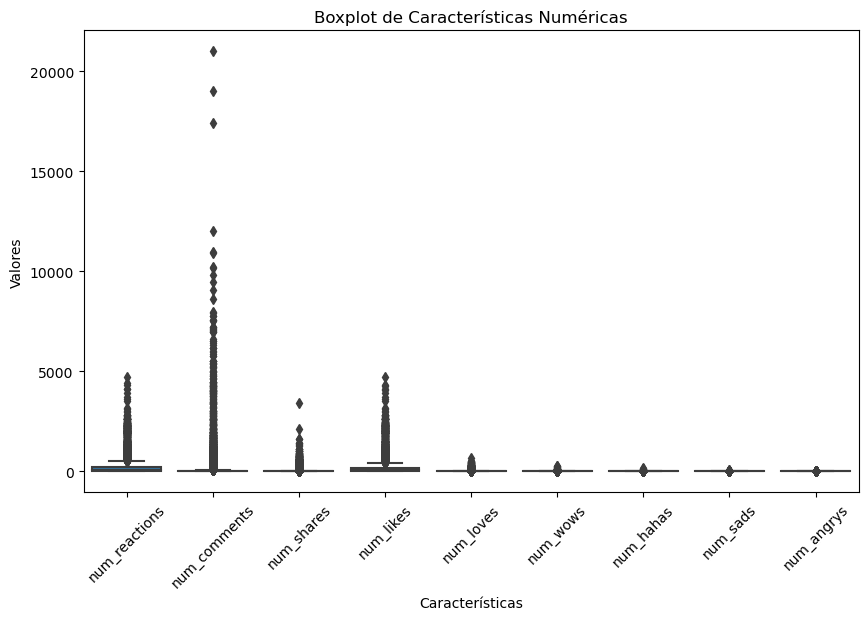

In [187]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
                    'num_hahas', 'num_sads', 'num_angrys']

plt.figure(figsize=(10, 6))
sns.boxplot(data=thai_data_scaled[features])
plt.title('Boxplot de Características Numéricas')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.xticks(rotation=45);

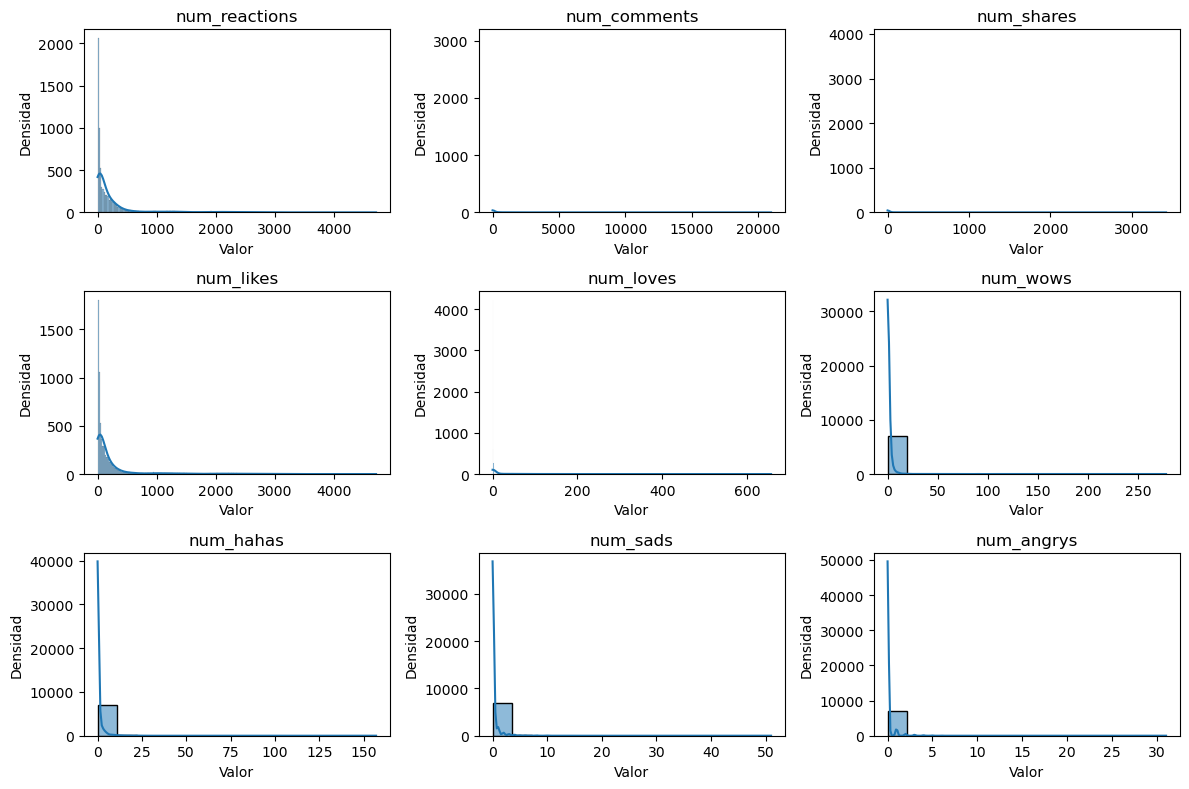

In [188]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(thai_data_scaled[feature], kde=True)
    plt.title(feature)
    plt.xlabel('Valor')
    plt.ylabel('Densidad')

plt.tight_layout();

En estos **histogramas**, vemos que en ninguno hay **normalidad** y de hecho la información se muestra sesgada a la izquierda. Esto puede significar que los valores más bajos son más comunes que los valores altos. 

En el **boxplot** tampoco vemos signos de normalidad, y apreciamos que todas las variables presentan **outliers**. Ahora lo compruebo numéricamente con el cálculo del rango intercuartil **IQR**.

In [189]:
numeric_features = thai_data_scaled[features]

Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))).any(axis=0)

print("Variables con outliers:")
print(outliers[outliers == True])

Variables con outliers:
num_reactions    True
num_comments     True
num_shares       True
num_likes        True
num_loves        True
num_wows         True
num_hahas        True
num_sads         True
num_angrys       True
dtype: bool


Podemos concluir que **todas las variables presentan outliers y no siguen una distribución normal**. 

Continuando con el preprocesado, aplicamos **RobustScaler** a estas variables numéricas con outliers.

In [190]:
robust_scaler = RobustScaler()
thai_data_scaled[features] = robust_scaler.fit_transform(thai_data_scaled[features])

thai_data_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,user_id,year_ordinal,categoria_horario_ordinal
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,1,4,6.0,2.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,1,0,0,4,6.0,2.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,1,4,6.0,2.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,1,0,0,4,6.0,2.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,1,0,0,4,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,1,0,0,0,4.0,2.0
6995,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,1,0,0,0,4.0,0.0
6996,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,1,0,0,0,4.0,2.0
6997,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,1,0,0,0,4.0,2.0


Una vez tenemos las **variables escaladas** realizo un **gráfico de dispersión** para cada una de ellas mostrándola **antes y después** de la escalación. 

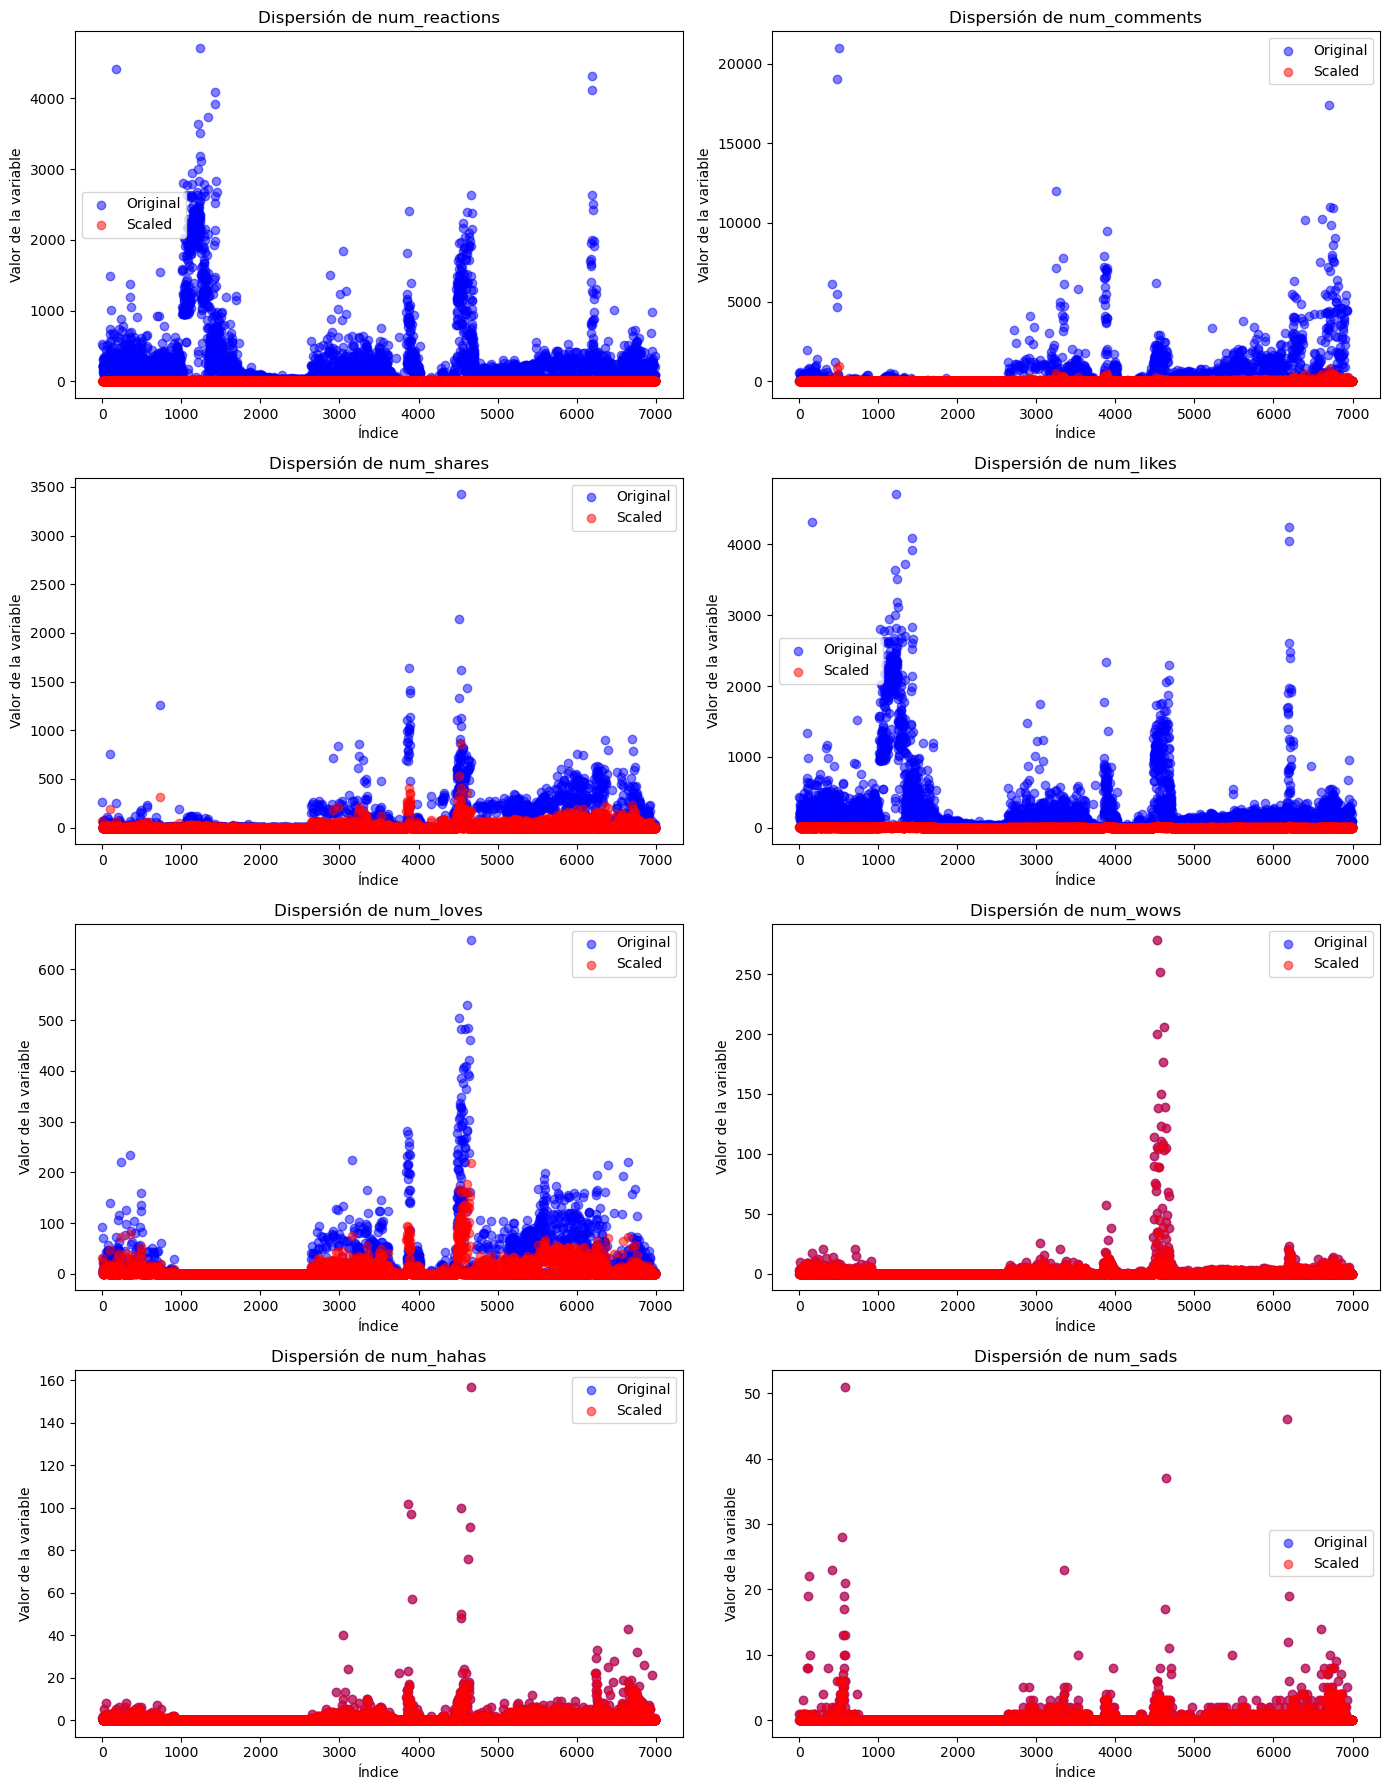

In [191]:
fig, axes = plt.subplots(4, 2, figsize=(14, 18))

for i, variable in enumerate(features):
    row = i // 2
    col = i % 2  
    
    if row < 4 and col < 2:
        axes[row, col].scatter(range(len(thai_data)), thai_data[variable], alpha=0.5, color='blue', label='Original')
        axes[row, col].scatter(range(len(thai_data_scaled)), thai_data_scaled[variable], alpha=0.5, color='red', label='Scaled')
        axes[row, col].set_title(f'Dispersión de {variable}')
        axes[row, col].set_xlabel('Índice')
        axes[row, col].set_ylabel('Valor de la variable')
        axes[row, col].legend()

plt.tight_layout();

Estos **gráficos de dispersión** muestran cada variable **antes** y **después** de la escalación. El color **azul** (menos en las tres últimas que aparecen en un rojo lila que no he podido cambiar) representa los datos sin escalar y el **rojo** los escalados. 

Los datos sin escalar tienen una dispersión amplia y concentrada en la mayoría de los casos en ciertas regiones del gráfico. Tras la aplicación de la escala la distribución se muestra más homogénea, uniforme en todo el espacio y con los puntos más cercanos entre sí, lo que sugiere mayor coherencia en los datos y una reducción en la variabilidad.

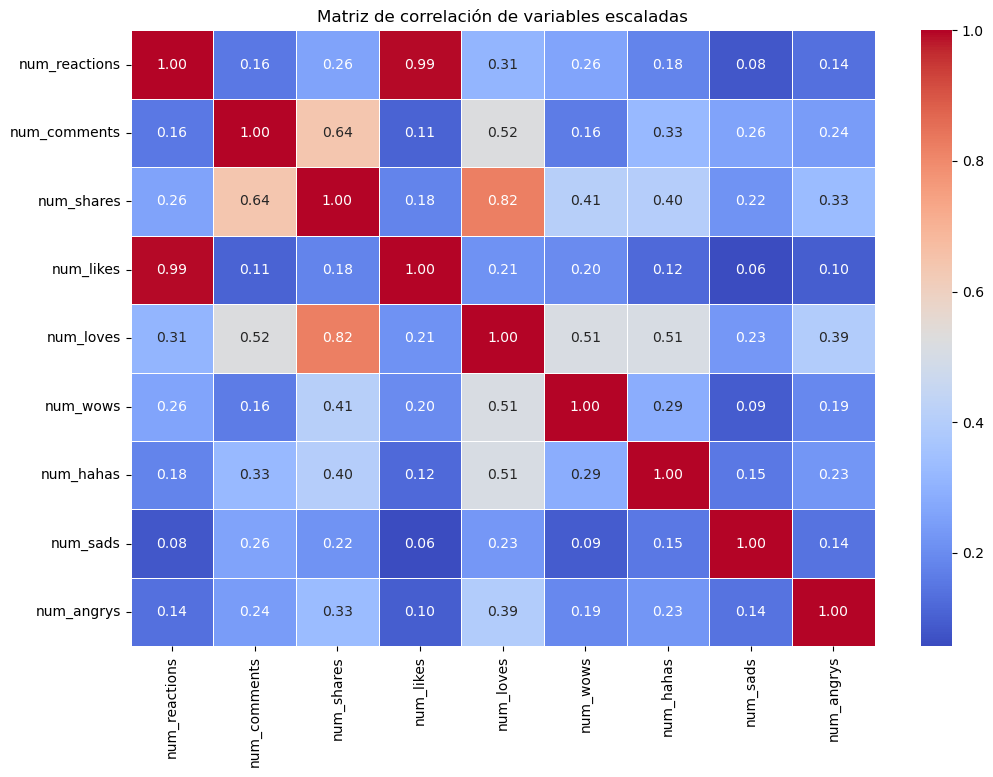

In [192]:
scaled_features_correlation = thai_data_scaled[features]

correlation_matrix = scaled_features_correlation.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación de variables escaladas");

En esta **matriz de correlación**, se exploran las relaciones entre las variables numéricas que representan el número de reacciones y su tipo, así como las reacciones totales, los comentarios y las veces que se ha compartido.

En general, se observa que hay muy poca correlación entre las variables. Sin embargo, destacan algunos ejemplos significativos. Se destaca una relación casi total **(0.99)** entre la cantidad de reacciones totales de una publicación y el número de "likes" que ha tenido. Además, se observa una correlación notable **(0.82)** entre la cantidad de veces que se ha compartido el post y el número de "loves" que ha recibido. Por último, hay una correlación considerable **(0.64)** entre las veces que se ha compartido y los comentarios que ha generado.

Es importante destacar que estas relaciones son positivas, lo que indica que si una variable aumenta, la otra también tiende a aumentar. No se observa ninguna correlación negativa, dado que no es posible tener un número negativo de "likes" o comentarios, y el valor mínimo es siempre **0**.
___


A continuación, iniciamos el análisis de componentes principales, también conocido como **PCA** por sus siglas en inglés (**P**rincipal **C**omponent **A**nalysis). Esta herramienta evalúa la posible reducción de la dimensionalidad de un conjunto de datos ayudándonos a encontrar nuevas maneras de representar la información que tenemos de una manera más simple y útil.

In [193]:
pca = PCA()

componentes_principales = pca.fit_transform(thai_data_scaled[features])
componentes_principales

array([[ 4.81419265e+01,  3.92798848e+01, -1.81081832e+00, ...,
         3.31571965e-01, -6.25016594e-01, -5.04525861e-05],
       [-1.48738066e+01, -2.24115087e+00, -5.64764583e-01, ...,
        -9.99089846e-02, -1.70037192e-02, -8.19939331e-06],
       [ 3.37124900e+00,  3.43814991e+00, -1.20919129e-02, ...,
        -2.80106871e-01, -1.55141236e-01, -1.78658339e-05],
       ...,
       [-1.48227361e+01, -2.17343213e+00, -4.68839839e-01, ...,
        -9.76132864e-02, -1.98658290e-02, -8.95505885e-06],
       [-1.10643138e+01,  1.57754780e+00, -1.89291878e+00, ...,
        -1.16580504e-01, -3.36255885e-02, -4.68455308e-06],
       [-1.48877326e+01, -2.26375291e+00, -6.43905065e-01, ...,
        -9.33773803e-02, -1.41267708e-02, -7.57888346e-06]])

Obtenemos la información de los **componentes principales**.

Este resultado muestra cuánta importancia tiene cada característica original en ese componente principal. Cada **fila** representa un **componente** y cada **columna** una **característica**. Estos componentes principales están ordenados en función de la cantidad de variabilidad que capturan en los datos, con el primero capturando la mayor cantidad y así sucesivamente.

Para seleccionar los componentes principales, la **varianza explicada** nos proporciona una medida fundamental para evaluar y entender qué tan bien representan los datos y cuánta información contiene cada componente.

In [194]:
varianza_explicada = pca.explained_variance_ratio_ 
varianza_explicada

array([7.84337406e-01, 1.70025075e-01, 2.43677715e-02, 1.30587924e-02,
       3.73572126e-03, 3.67530881e-03, 6.68379165e-04, 1.31545205e-04,
       3.43318848e-11])

El resultado que obtenemos es una fracción que va de 0 a 1, donde 1 representa que el componente principal explica toda la variabilidad en los datos y 0 representa que no explica nada.

En nuestro caso tenemos el primer componente con un resultado de **0.78**, el segundo baja a **0.17** y a partir del tercero **(0.02)** ya son cantidades muy bajas. 

En el siguinete **gráfico**, mostramos la **varianza explicada** en función del número de componentes. Esto nos permite determinar cuántos componentes principales son necesarios para capturar la mayoría de la variabilidad en los datos.

Text(0.5, 1.0, 'Varianza Acumulada')

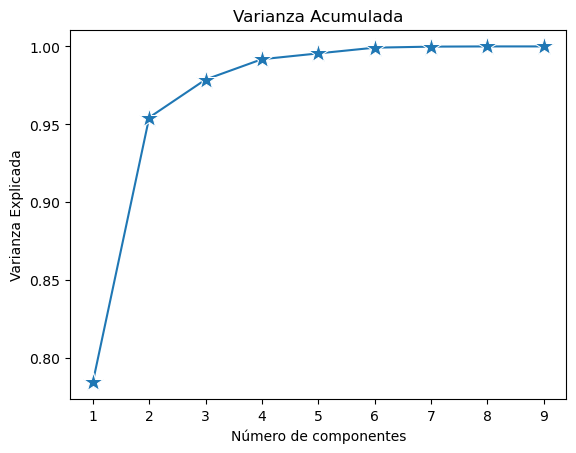

In [195]:
varianza_acumulada = varianza_explicada.cumsum()

sns.lineplot(x=range(1, 10), y=varianza_acumulada, marker='*', markersize=15)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Acumulada')

Con los 3 primeros componentes vemos que se explica la gran mayoría de la variabilidad de nuestros datos. De acuerdo a estos resultados, aplicamos **PCA** a los **3 primeros componentes** y guardamos los resultados en un nuevo df llamado **'thai_data_pca'**.

In [196]:
pca = PCA(n_components=3)

thai_data_pca = pd.DataFrame(pca.fit_transform(thai_data_scaled[features]), columns=['PCA1','PCA2','PCA3'])
thai_data_pca

,PCA1,PCA2,PCA3
0,48.141927,39.279885,-1.810818
1,-14.873807,-2.241151,-0.564765
2,3.371249,3.438150,-0.012092
3,-14.877890,-2.247779,-0.587971
4,-14.268106,-1.394616,1.128641
...,...,...,...
6994,-14.880194,-2.251517,-0.601062
6995,-14.788323,-2.142925,-0.329232
6996,-14.822736,-2.173432,-0.468840
6997,-11.064314,1.577548,-1.892919


Ahora **concatenamos** este df con las **variables categóricas** de **'thai_data_scaled'** y lo guardamos como **'thai_data_model'**.

In [197]:
thai_data_model=pd.concat([thai_data_pca, thai_data_scaled[['status_type_photo',
       'status_type_status', 'status_type_video', 'user_id', 'year_ordinal',
       'categoria_horario_ordinal']]], axis=1)
thai_data_model

,PCA1,PCA2,PCA3,status_type_photo,status_type_status,status_type_video,user_id,year_ordinal,categoria_horario_ordinal
0,48.141927,39.279885,-1.810818,0,0,1,4,6.0,2.0
1,-14.873807,-2.241151,-0.564765,1,0,0,4,6.0,2.0
2,3.371249,3.438150,-0.012092,0,0,1,4,6.0,2.0
3,-14.877890,-2.247779,-0.587971,1,0,0,4,6.0,2.0
4,-14.268106,-1.394616,1.128641,1,0,0,4,6.0,2.0
...,...,...,...,...,...,...,...,...,...
6994,-14.880194,-2.251517,-0.601062,1,0,0,0,4.0,2.0
6995,-14.788323,-2.142925,-0.329232,1,0,0,0,4.0,0.0
6996,-14.822736,-2.173432,-0.468840,1,0,0,0,4.0,2.0
6997,-11.064314,1.577548,-1.892919,1,0,0,0,4.0,2.0


Una vez creado **'thai_data_model'** con las **variables categóricas** y los **componentes principales**, pasamos al proceso de **clusterización** empezando por determinar cuantos clústers serían apropiados.

Para esto usamos el **'método del codo'** que calcula en función de las **inercias** el número de clústers mediante el algoritmo **KMeans**.

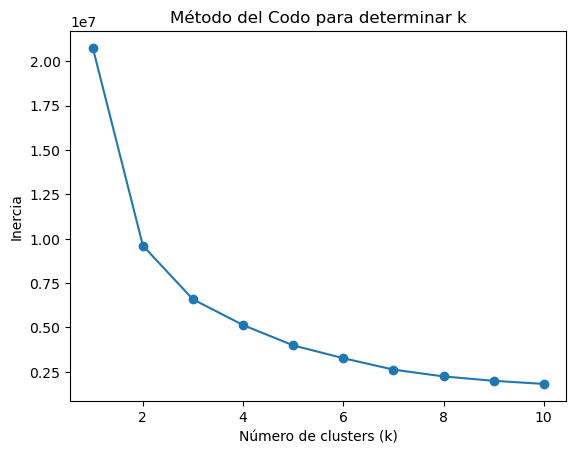

In [198]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(thai_data_model)  
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k');

En el gráfico parece estar entre 3 y 4. Ahora usamos la lista de **inercias** que ha generado **KMeans** y calculamos el número óptimo de clústers mediante **KneeLocator**.

In [199]:
knee = KneeLocator(range(1,11), inertias, curve='convex', direction='decreasing')
print("Número óptimo", knee.elbow)

Número óptimo 3


Una vez sabemos cuantos clusters usar, pasamos a entrenar el modelo **'KMeans'** con los siguienrtes ajustes.  n_clusters=3, una semilla para fijar la reproducibilidad y le indicamos que repita la ejecución del modelo 10 veces con diferentes configuraciones iniciales de centroides aleatorios. 

In [200]:
km = KMeans(n_clusters=3, random_state=42, n_init=10)

km.fit(thai_data_model)  

labels = km.predict(thai_data_model)  

labels

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

El modelo asigna una **etiqueta** a cada fila de **datos**. Las etiquetas representan en que **cluster** está cada una de esas filas.

Una vez entrenado el modelo, añadimos los resultados en una columna nueva al df original **'thai_data'**.

También aprovecho para recuperar las etiquetas creadas en **'thai_data_scaled['user_id']'** ya que este cambio no afecta al análisis y proporciona una visión mucho más clara de la identificación del usuario.

In [201]:
thai_data['cluster_km']=km.labels_

user_ids = thai_data_scaled['user_id']

thai_data['user_id'] = user_ids
thai_data.drop(columns=['id_user'], inplace=True)

thai_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,categoria_horario,cluster_km,user_id
0,video,529,512,262,432,92,3,1,1,0,2018,noche,2,4
1,photo,150,0,0,150,0,0,0,0,0,2018,noche,0,4
2,video,227,236,57,204,21,1,1,0,0,2018,noche,0,4
3,photo,111,0,0,111,0,0,0,0,0,2018,noche,0,4
4,photo,213,0,0,204,9,0,0,0,0,2018,noche,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0,2016,noche,0,0
6995,photo,16,0,0,14,1,0,1,0,0,2016,mañana,0,0
6996,photo,2,0,0,1,1,0,0,0,0,2016,noche,0,0
6997,photo,351,12,22,349,2,0,0,0,0,2016,noche,0,0


# REPRESENTACIONES GRÁFICAS

___

Ahora pasamos a una serie de **visualizaciones** comenzando por una que muestra los **tres clusters** en un **gráfico de dispersión**. Aquí veremos cómo se distribuyen los datos en relación con los dos primeros componentes principales.



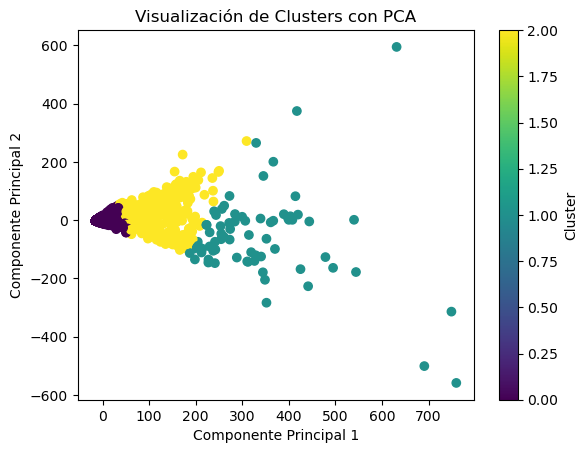

In [202]:
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con PCA')
plt.colorbar(label='Cluster');

En este caso, observamos que los **datos** correspondientes al **primer cluster (0)** están muy **concentrados** en un espacio reducido. Esto se debe a que los datos están cercanos a su centroide y tienen una dispersión muy baja. Los datos del **tercer cluster (2)** también muestran una **concentración notable**, lo que sugiere que están cercanos a su centroide, aunque presentan algo más de dispersión que el primer cluster. Por otro lado, el **segundo cluster (1)** es el que muestra una **mayor dispersión**.

A continuación, añado el tercer componente principal.

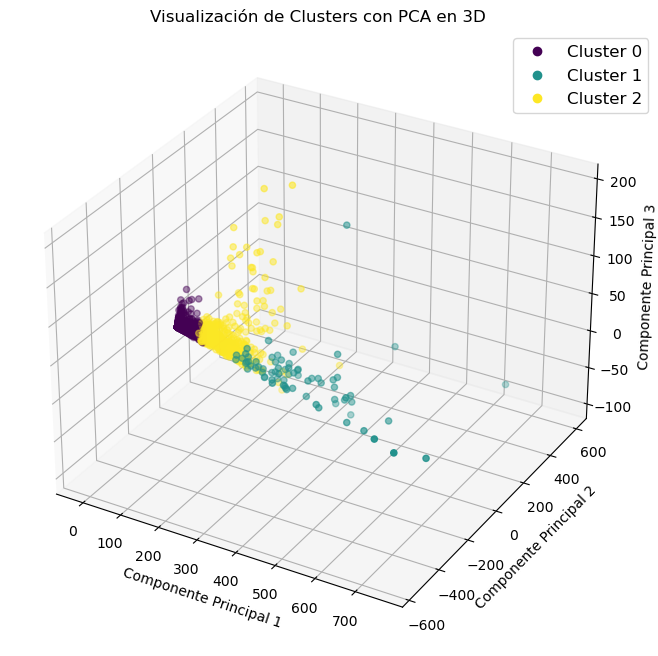

In [203]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(componentes_principales[:, 0], componentes_principales[:, 1], componentes_principales[:, 2], c=labels, cmap='viridis')

unique_labels = np.unique(labels)
legend_handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}', linestyle='None') for label in unique_labels]

plt.legend(handles=legend_handles, loc='upper right', fontsize='large', bbox_to_anchor=(1.05, 1))

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.title('Visualización de Clusters con PCA en 3D');

Al añadir el **tercer componente** vemos que aparece **más dispersión** en los tres clusters pero sobretodo en el segundo.

Ahora muestro la **representación de los clusters por año**. Es decir, como se reparte la información de cada año en los diferentes clusters obtenidos.

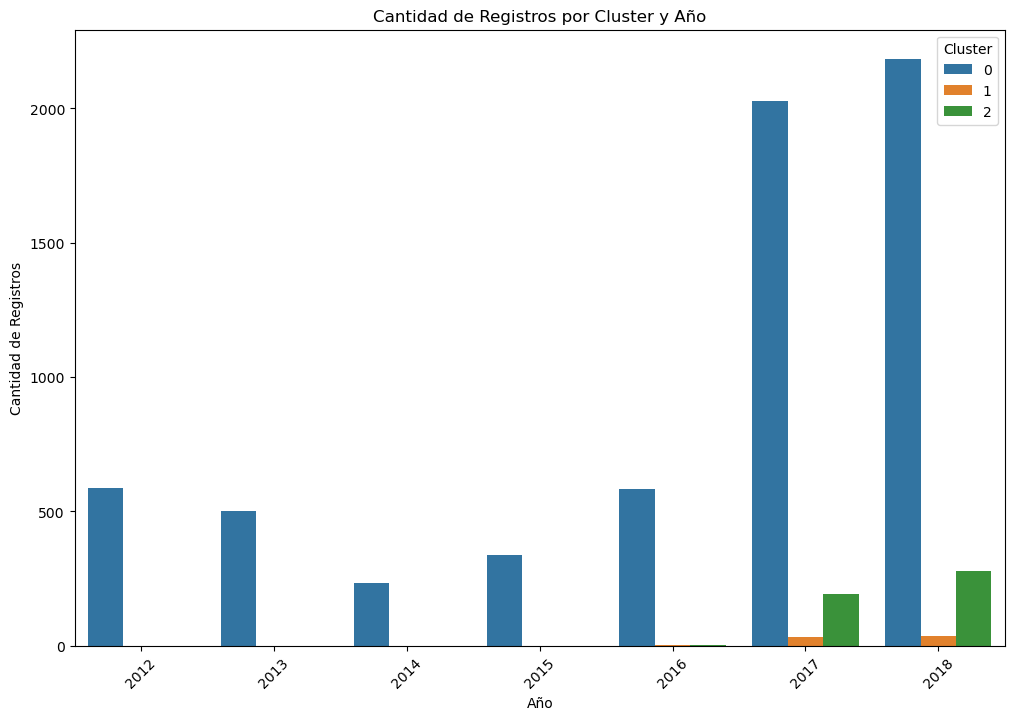

In [204]:
cluster_counts_per_year = thai_data.groupby(['year', 'cluster_km']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_counts_per_year, x='year', y='count', hue='cluster_km')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Cluster y Año')
plt.xticks(rotation=45)
plt.legend(title='Cluster');

Lo primero a destacar es que **entre 2012 y 2015** incluyendo ambos años, **toda la información está en el cluster 0**. En 2016 ya se aprecia un mínimo de información de los otros dos clusters, que aumenta en 2017 y en 2018. 

Podemos entender que entre 2012 y 2016 los datos se agrupan en torno a una caracteristica o patrón presente en el cluster 0. 

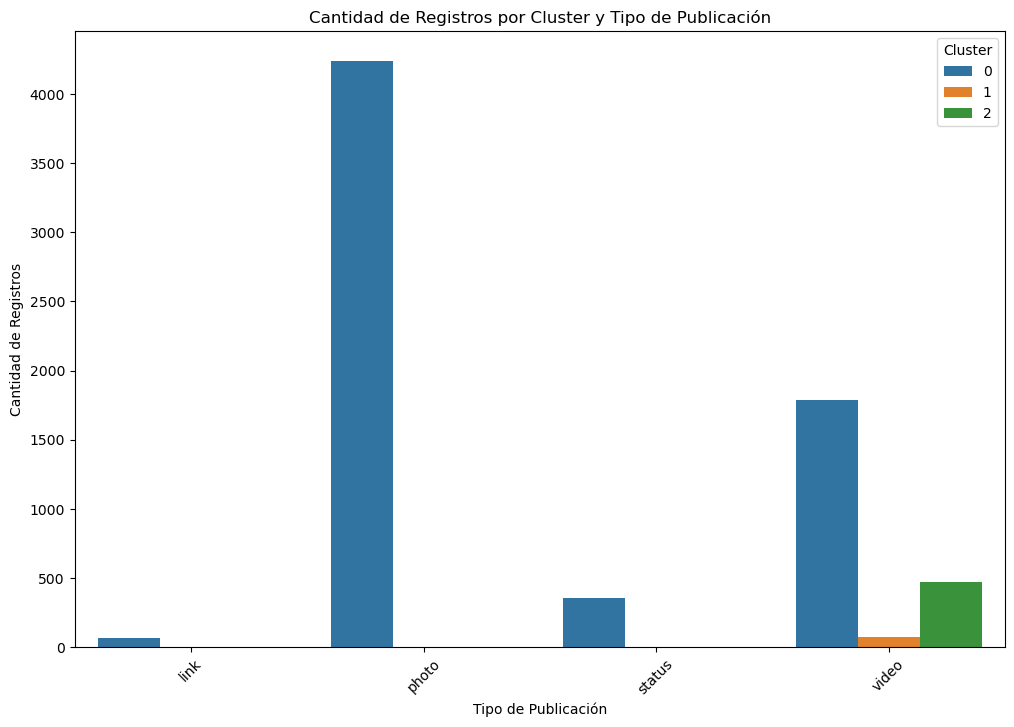

In [205]:
cluster_counts_per_status = thai_data.groupby(['status_type', 'cluster_km']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_counts_per_status, x='status_type', y='count', hue='cluster_km')
plt.xlabel('Tipo de Publicación')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Cluster y Tipo de Publicación')
plt.xticks(rotation=45)
plt.legend(title='Cluster');

En este caso hemos graficado los **clusters por tipo de publicación** (link, photo, status, video). 

También se observa una gran **predominancia** de resultados dentro del **cluster 0**. Todas las publicaciones clasificadas como **'link'** y **'status'** están dentro del cluster 0 y no hay representación en ninguno de los otros dos. La clasificación por **'video'**, es la más equilibrada ya que hay presencia en los tres clusters, pero igualmente hay muchos más datos en el cluster 0 (cerca de 2000 registros), que en el 2 (unos 500) y en el 1 (menos de 100 registros). Por último tenemos el concepto **'photo'** que es el que tiene más registros totales. Hay una cantidad mínima de resultados (diría que menos de 20) en el cluster 2, ninguna en el cluster 1 y casi unos 4500 resultados presenes en el cluster 0.

Una conclusión evidente es que la mayoría de las publicaciones son fotos, seguido de lejos por los vídeos y ya con mucha diferencia se encuentran las publicaciones de estado y los enlaces.

In [206]:
thai_data.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'year', 'categoria_horario', 'cluster_km', 'user_id'],
      dtype='object')

A continuación se muestra la **representación de cada variable en cada uno de los tres clusters**. Es importante destacar que los gráficos no están en la misma escala. Si fuera de esa manera, no se apreciaría ninguna representacion en varios de los **histogramas**.

En la primera fila de tres gráficos (referente al tipo de publicación) vemos para empezar que la escala en cluster 0 alcanza mas de 4000 registros, en el 1 estamos cercanos al 80 y en el 2, sobre unos 500. Lo que se corresponde con lo visto en el gráfico anterior a este.

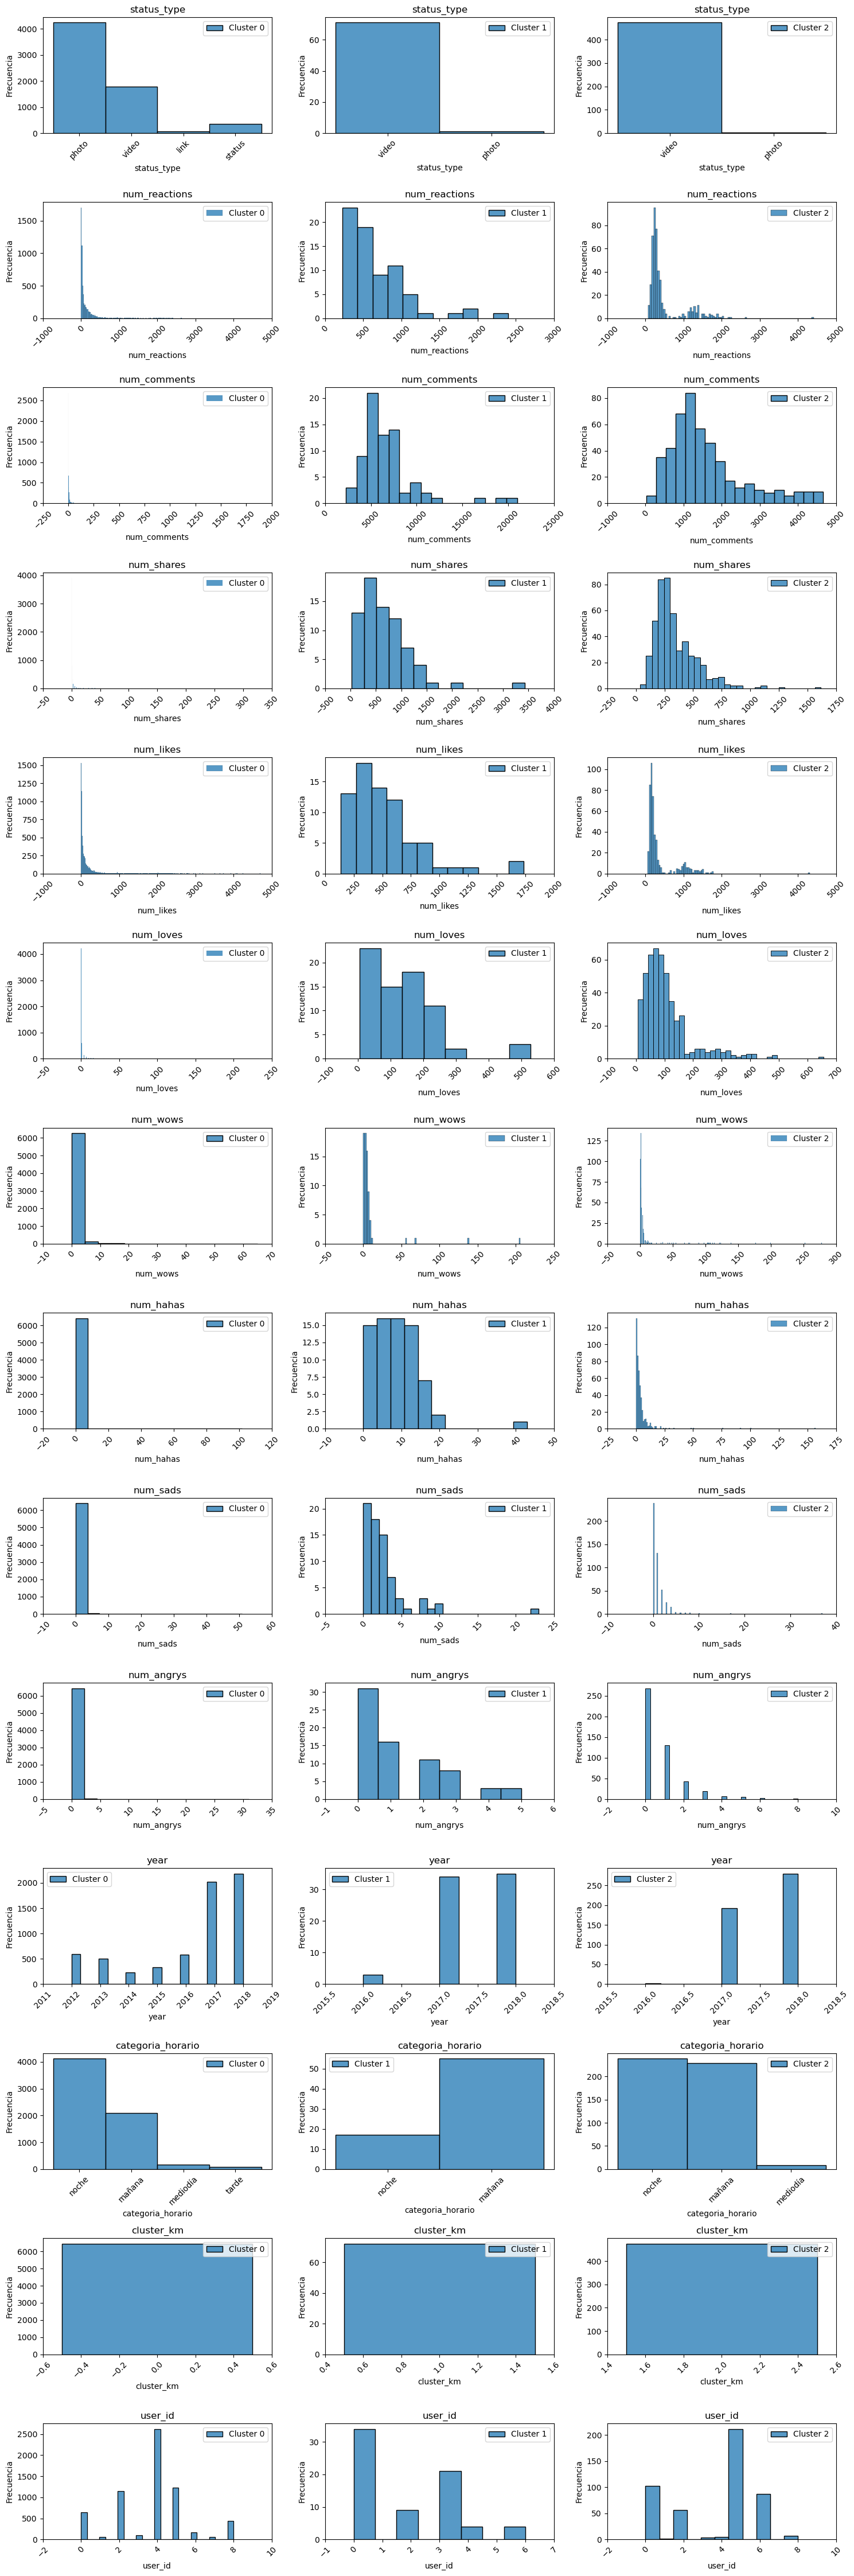

In [207]:
fig, axes = plt.subplots(len(thai_data.columns), 3, figsize=(15, 45))

for i, variable in enumerate(thai_data.columns):
    for j, cluster in enumerate(range(0, 3)):
        cluster_data = thai_data[thai_data['cluster_km'] == cluster]
        sns.histplot(data=cluster_data, x=variable, label=f'Cluster {cluster}', ax=axes[i, j])

        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Frecuencia')
        axes[i, j].set_title(variable)
        axes[i, j].legend()
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)
        

plt.tight_layout()

El resto de **histogramas** siguen un poco la misma tendencia que lo visto en los tres primeros. Hay **más presencia** siempre del **cluster 0**, teniendo una escala mucho mayor que los otros dos. Destacamos que las reacciones clasificadas como **wows, hahas, sads y angrys**, **suben la escala** en las representaciones de los tres clusters. En general sigue la misma tendencia, muchos más resultados para 0 y un poco más de resultados en 2 comparado con 1. También es **destacable** que en los **histogramas referentes a reacciones, comentarios y veces compratido**, el cluster 0 muestra resultados de hasta más de **6000 registros** pero **concentrados** todos en un **mismo punto** en el **eje y**.

### CLASIFICACIÓN DE LOS DIFERENTES REGISTROS USANDO EL ALGORITMO DE CLUSTERIZACIÓN JERÁRQUICO.

Ahora volvemos al data frame **'thai_data_scaled'** para aplicar en este caso la clusterización jerárquica o aglomerativa. 

En la siguiente celda, calculo los nuevos clusters a través de una **matriz de enlace** y posteriormente lo representamos con un **dendrograma**.

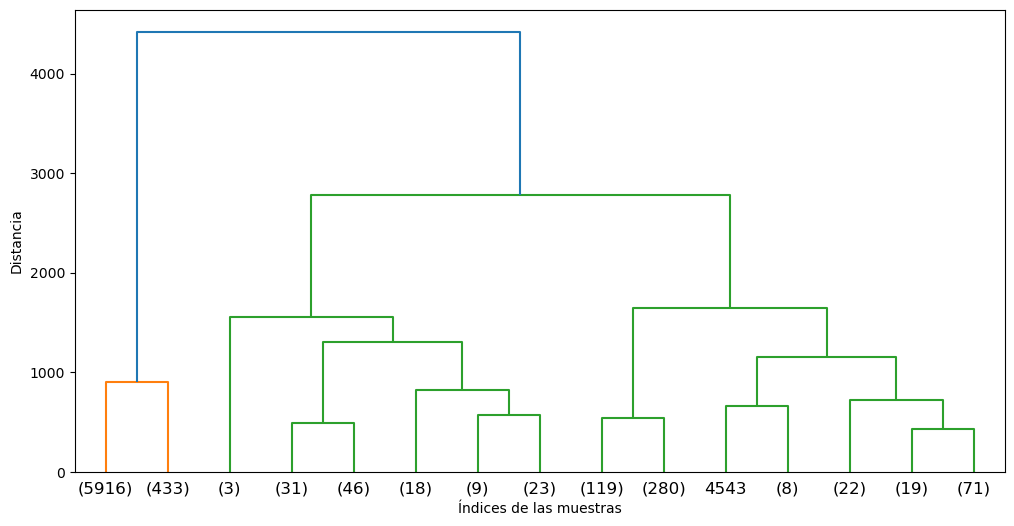

In [135]:
plt.figure(figsize=(12, 6))
linkage_matrix=linkage(thai_data_model, method='ward')
dendrogram(linkage_matrix, p=15, truncate_mode='lastp')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia');

El **dendrograma** ilustra cómo las **observaciones individuales** se **agrupan** en diferentes **niveles** de **similitud o distancia**. A medida que ascendemos en el eje x del dendrograma, los **grupos de observaciones** se fusionan gradualmente, **formando clusters más grandes**. Esta estructura se asemeja a una pirámide, donde las observaciones individuales se agrupan en pequeñas ramas que se convierten en clusters más grandes en la cima. La altura de cada unión en el dendrograma representa la distancia o similitud entre los clusters que se están fusionando, proporcionando una representación visual de la estructura jerárquica de los datos en el análisis de clustering.

Una de las características del dendrograma es poder aplicar una **línea de corte** para determinar visulamente el **número de clusters**.

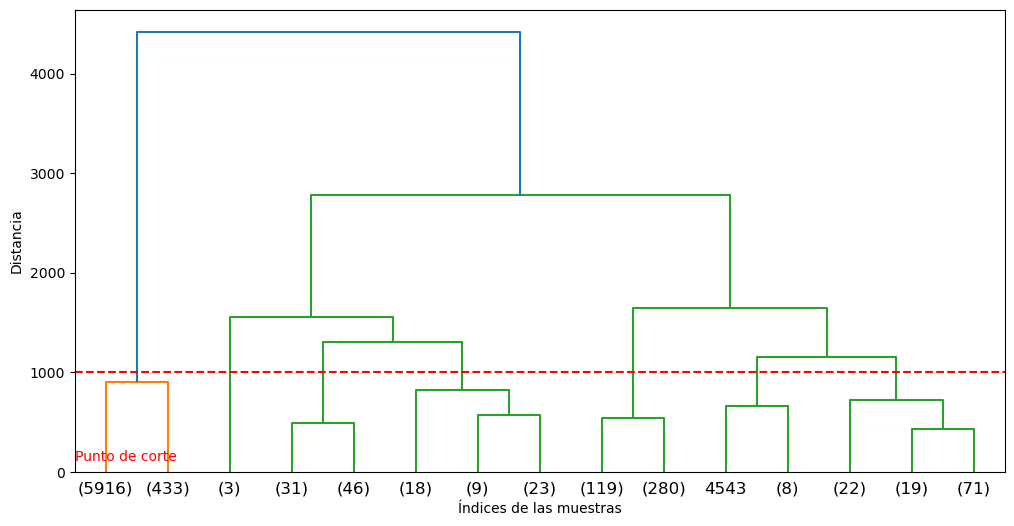

In [208]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=15, truncate_mode='lastp')

plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')

plt.axhline(y=1000, color='r', linestyle='--')
plt.text(0, 110, 'Punto de corte', color='red');

En este ejemplo, la **línea de corte** del dendrograma **atraviesa 7 líneas verticales**, lo que indica que se ha realizado el corte después de 7 fusiones de clusters. Sin embargo, determinar el punto óptimo de corte en el gráfico requiere un análisis más detallado y más interpretación de los datos.

A continuación, procedemos con el **entrenamiento del modelo de clustering jerárquico**. Indicamos que sean 3 clusters por los resultados obtenidos anteriormente con **kneed**. Añadimos los resultados en una columna del dataframe original **'thai_data'**.

In [209]:
clus_jera = AgglomerativeClustering(n_clusters=3)

thai_data['cluster_jerarquico'] = clus_jera.fit_predict(thai_data_model)
thai_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,categoria_horario,cluster_km,user_id,cluster_jerarquico
0,video,529,512,262,432,92,3,1,1,0,2018,noche,2,4,0
1,photo,150,0,0,150,0,0,0,0,0,2018,noche,0,4,1
2,video,227,236,57,204,21,1,1,0,0,2018,noche,0,4,1
3,photo,111,0,0,111,0,0,0,0,0,2018,noche,0,4,1
4,photo,213,0,0,204,9,0,0,0,0,2018,noche,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0,2016,noche,0,0,1
6995,photo,16,0,0,14,1,0,1,0,0,2016,mañana,0,0,1
6996,photo,2,0,0,1,1,0,0,0,0,2016,noche,0,0,1
6997,photo,351,12,22,349,2,0,0,0,0,2016,noche,0,0,1


Los resultados obtenidos y guardados en la nueva columna **cluster_jerarquico** funcionan como etiquetas para indicar en que cluster está cada una de las filas de nuestro df.

A continuación se muestra un **gráfico de barras comparando los clusters obtenidos con ambos métodos**.

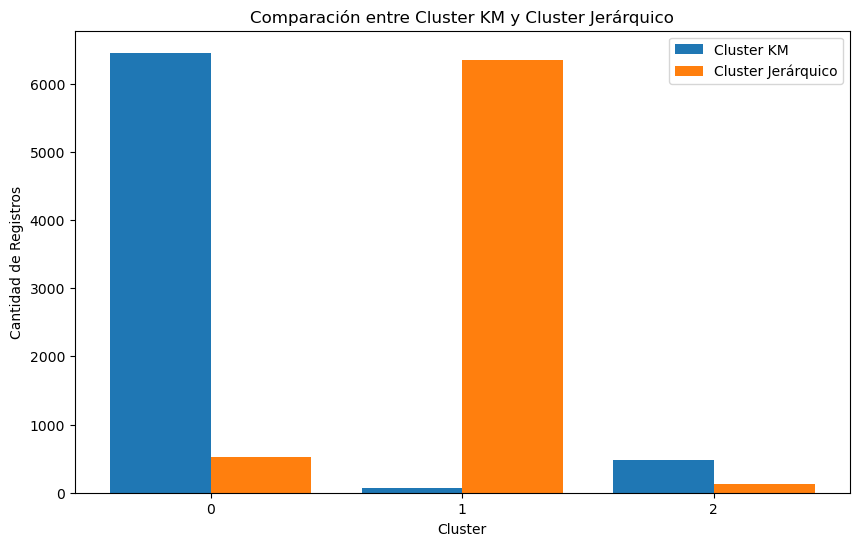

In [210]:
cluster_km_counts = thai_data['cluster_km'].value_counts().sort_index()

cluster_jerarquico_counts = thai_data['cluster_jerarquico'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(cluster_km_counts.index - 0.2, cluster_km_counts.values, width=0.4, label='Cluster KM')
plt.bar(cluster_jerarquico_counts.index + 0.2, cluster_jerarquico_counts.values, width=0.4, label='Cluster Jerárquico')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de Registros')
plt.title('Comparación entre Cluster KM y Cluster Jerárquico')
plt.xticks(cluster_km_counts.index)

plt.legend();

Observamos que la información en los clusters se reparte de manera casi idéntica pero con diferentes etiquetas para cada uno. El número de registros del **cluster 0 KMeans** es prácticamente igual que el **cluster 1 jerárquico**. De la misma manera, el **cluster 2 km** se asemeja al **cluster 0 jerárquico** y **cluster 1 km** a **cluster 2 jerárquico**. 
Vemos que, aunque los números de cluster pueden variar entre los dos métodos, la distribución de los datos entre los clusters es similar.

Miramos más de cerca estos datos con un **value_counts()** de cada columna.

In [139]:
thai_data['cluster_km'].value_counts()

0    6452
2     475
1      72
Name: cluster_km, dtype: int64

In [104]:
thai_data['cluster_jerarquico'].value_counts()

1    6349
0     520
2     130
Name: cluster_jerarquico, dtype: int64

Corroboramos que el **reparto** hecho entre los dos tipos de clusters es **muy parecido**. Si que podemos destacar que aunque haya poca información y en porcentaje serán parecidos, la información en el cluster 2 jerárquico casi dobla a la que hay en cluster 1 km.

# MÉTRICAS 

In [143]:
silhouette_km = silhouette_score(thai_data_model, thai_data['cluster_km'])

silhouette_hierarchical = silhouette_score(thai_data_model, thai_data['cluster_jerarquico'])

print("Índice de Silueta para KMeans:", silhouette_km)
print("Índice de Silueta para Clustering Jerárquico:", silhouette_hierarchical)

Índice de Silueta para KMeans: 0.8524928624468882
Índice de Silueta para Clustering Jerárquico: 0.8427115143130421


Tras calcular los **índices de silueta** para ambos algoritmos de clustering, observamos que el método **KMeans** obtuvo un score **ligeramente superior (0.852)** en comparación con el **Clustering Jerárquico (0.843)** en nuestro conjunto de datos. Este resultado sugiere que, en este caso particular, el algoritmo KMeans pudo haber logrado una separación más eficiente entre los clusters con una mayor cohesión de los datos dentro de cada uno de ellos.

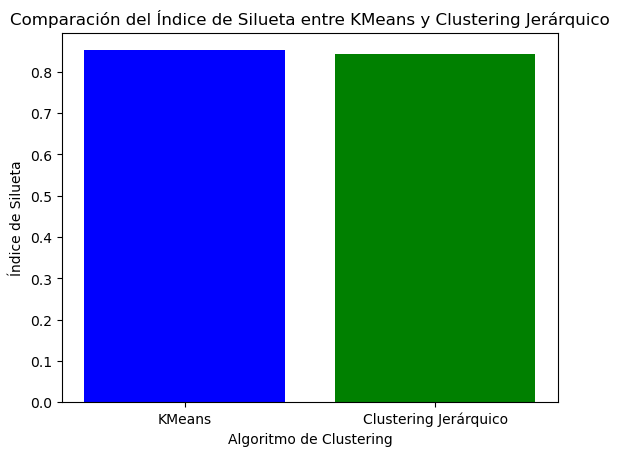

In [146]:
silhouette_scores = [silhouette_km, silhouette_hierarchical]

labels = ['KMeans', 'Clustering Jerárquico']

plt.bar(labels, silhouette_scores, color=['blue', 'green'])
plt.xlabel('Algoritmo de Clustering')
plt.ylabel('Índice de Silueta')
plt.title('Comparación del Índice de Silueta entre KMeans y Clustering Jerárquico');

Al **representar gráficamente** los **valores de silueta** para cada algoritmo, confirmamos visualmente que, aunque la diferencia entre los valores no es significativa, el método KMeans tiende a tener un rendimiento ligeramente mejor en términos de índice de silueta.